In [15]:
pip install matplotlib seaborn plotly pandas numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
transactions = pd.read_excel('3) Take-home Test_Questions.xlsx',sheet_name='Data Transactions')
commission = pd.read_excel('3) Take-home Test_Questions.xlsx',sheet_name='Data Commission')
user_info = pd.read_excel('3) Take-home Test_Questions.xlsx',sheet_name='Data User_Info')


In [18]:
transactions.info()
commission.info()
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13495 entries, 0 to 13494
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          13495 non-null  int64 
 1   order_id         13495 non-null  int64 
 2   Date             13495 non-null  object
 3   Amount           13495 non-null  int64 
 4   Merchant_id      13495 non-null  int64 
 5   Purchase_status  2235 non-null   object
dtypes: int64(4), object(2)
memory usage: 632.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Merchant_name  5 non-null      object
 1   Merchant_id    5 non-null      int64 
 2   Rate_pct       5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13428 entries, 0 to 13427
Data columns (total 5 columns):
 #

In [19]:
transactions['Date'] = pd.to_datetime(transactions['Date'], errors='coerce')
user_info['first_tran_date'] = pd.to_datetime(user_info['first_tran_date'], errors='coerce')



In [20]:
# Merge the Transactions and Commission tables
merged_df = pd.merge(transactions, commission, on='Merchant_id')

# Calculate the Revenue column
merged_df['Revenue'] = merged_df['Amount'] * (merged_df['Rate_pct'] / 100)

# Convert the 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Filter the data for January 2020
jan_2020_df = merged_df[(merged_df['Date'] >= '2020-01-01') & (merged_df['Date'] < '2020-02-01')]

# Calculate the total revenue for January 2020
total_revenue_jan_2020 = jan_2020_df['Revenue'].sum()

print(f"MoMo's total revenue in January 2020: {total_revenue_jan_2020}")

MoMo's total revenue in January 2020: 1409827.02


In [21]:
# Calculate the Revenue column
merged_df['Revenue'] = merged_df['Amount'] * (merged_df['Rate_pct'] / 100)

# Extract month and year from the 'Date' column
merged_df['YearMonth'] = merged_df['Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate the total revenue for each month
monthly_revenue = merged_df.groupby('YearMonth')['Revenue'].sum().reset_index()

# Identify the month with the highest revenue
most_profitable_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmax()]

print(f"MoMo's most profitable month is: {most_profitable_month['YearMonth']} with revenue: {most_profitable_month['Revenue']}")

MoMo's most profitable month is: 2020-10 with revenue: 1690900.0


C:\Users\OP-LT-0315\AppData\Local\Temp\ipykernel_11620\2543540974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_profitable_month['YearMonth'] = str(most_profitable_month['YearMonth'])


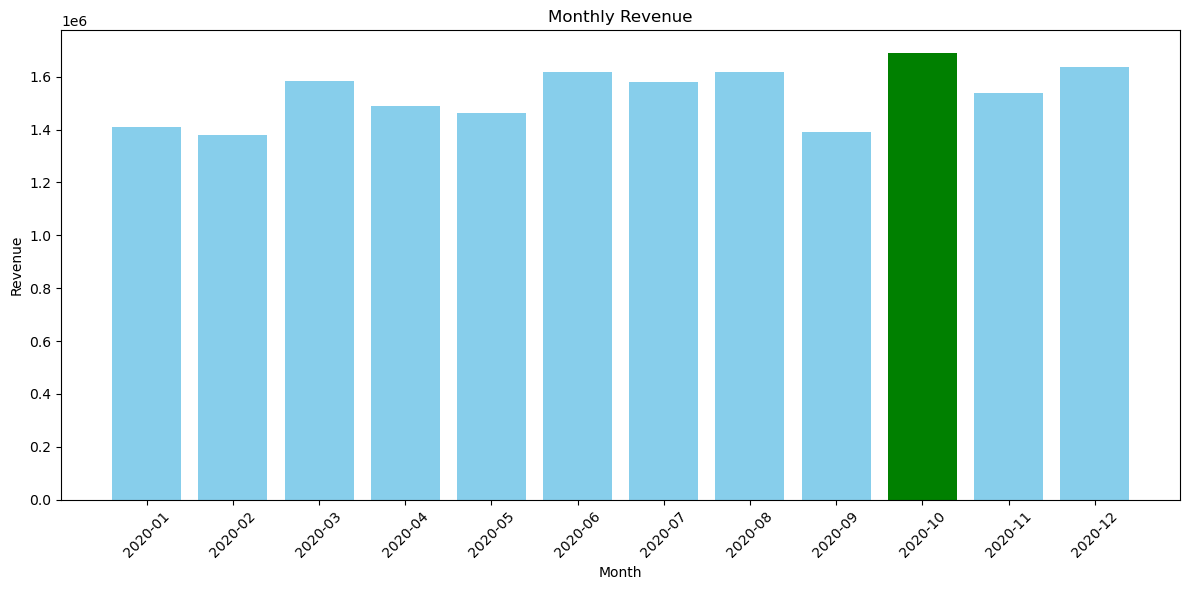

In [22]:
# Convert 'YearMonth' to string for plotting
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)
most_profitable_month['YearMonth'] = str(most_profitable_month['YearMonth'])

# Plot the monthly revenue
plt.figure(figsize=(12, 6))
plt.bar(monthly_revenue['YearMonth'], monthly_revenue['Revenue'], color='skyblue')

# Highlight the most profitable month
plt.bar(most_profitable_month['YearMonth'], most_profitable_month['Revenue'], color='green')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()

MoMo makes the most money on average on: Wednesday with an average revenue of: 1488.6113886113885
MoMo makes the least money on average on: Sunday with an average revenue of: 1281.8761744186047


C:\Users\OP-LT-0315\AppData\Local\Temp\ipykernel_11620\228825636.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_revenue = merged_df.groupby('DayOfWeek')['Revenue'].mean().reset_index()


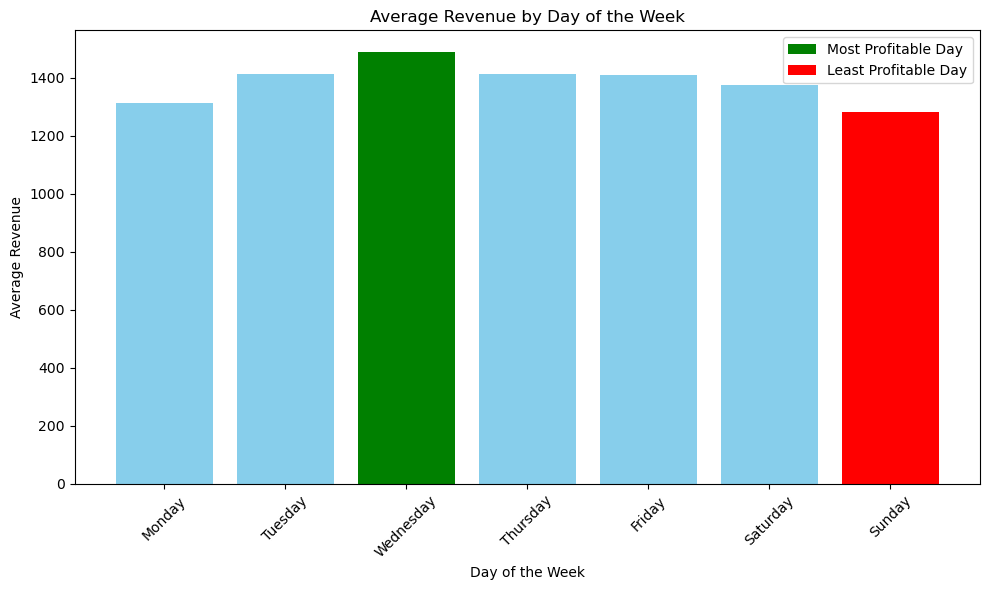

In [23]:
# Extract the day of the week from the 'Date' column
merged_df['DayOfWeek'] = merged_df['Date'].dt.day_name()

# Define the custom order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'DayOfWeek' to a categorical type with the custom order
merged_df['DayOfWeek'] = pd.Categorical(merged_df['DayOfWeek'], categories=day_order, ordered=True)

# Group by 'DayOfWeek' and calculate the average revenue for each day
daily_revenue = merged_df.groupby('DayOfWeek')['Revenue'].mean().reset_index()

# Identify the day with the highest and lowest average revenue
most_profitable_day = daily_revenue.loc[daily_revenue['Revenue'].idxmax()]
least_profitable_day = daily_revenue.loc[daily_revenue['Revenue'].idxmin()]

print(f"MoMo makes the most money on average on: {most_profitable_day['DayOfWeek']} with an average revenue of: {most_profitable_day['Revenue']}")
print(f"MoMo makes the least money on average on: {least_profitable_day['DayOfWeek']} with an average revenue of: {least_profitable_day['Revenue']}")

# Plot the average revenue by day of the week
plt.figure(figsize=(10, 6))
plt.bar(daily_revenue['DayOfWeek'], daily_revenue['Revenue'], color='skyblue')

# Highlight the most and least profitable days
plt.bar(most_profitable_day['DayOfWeek'], most_profitable_day['Revenue'], color='green', label='Most Profitable Day')
plt.bar(least_profitable_day['DayOfWeek'], least_profitable_day['Revenue'], color='red', label='Least Profitable Day')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Day of the Week')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()

In [24]:
# Convert 'user_id' columns to string for merging
user_info['user_id'] = user_info['user_id'].astype(str)
merged_df['user_id'] = merged_df['user_id'].astype(str)

# Perform the full merge
merged_df = pd.merge(merged_df, user_info, on='user_id', how='left')

# Define the function to categorize users as New or Current
def categorize_user(first_tran_date, current_date):
    if pd.isna(first_tran_date):
        return 'Unknown'
    return 'New' if first_tran_date >= current_date - pd.DateOffset(years=1) else 'Current'
# Apply the categorization
merged_df['Type_user'] = merged_df.apply(lambda x: categorize_user(x['first_tran_date'], x['Date']), axis=1)
# Filter data for July 2020
july_2020_data = merged_df[(merged_df['YearMonth'] == '2020-07')]
# Calculate the total number of new users in July 2020
new_users_july_2020 = july_2020_data[july_2020_data['Type_user'] == 'New']['user_id'].nunique()
print(f"Total number of new users in July 2020: {new_users_july_2020}")


Total number of new users in July 2020: 633


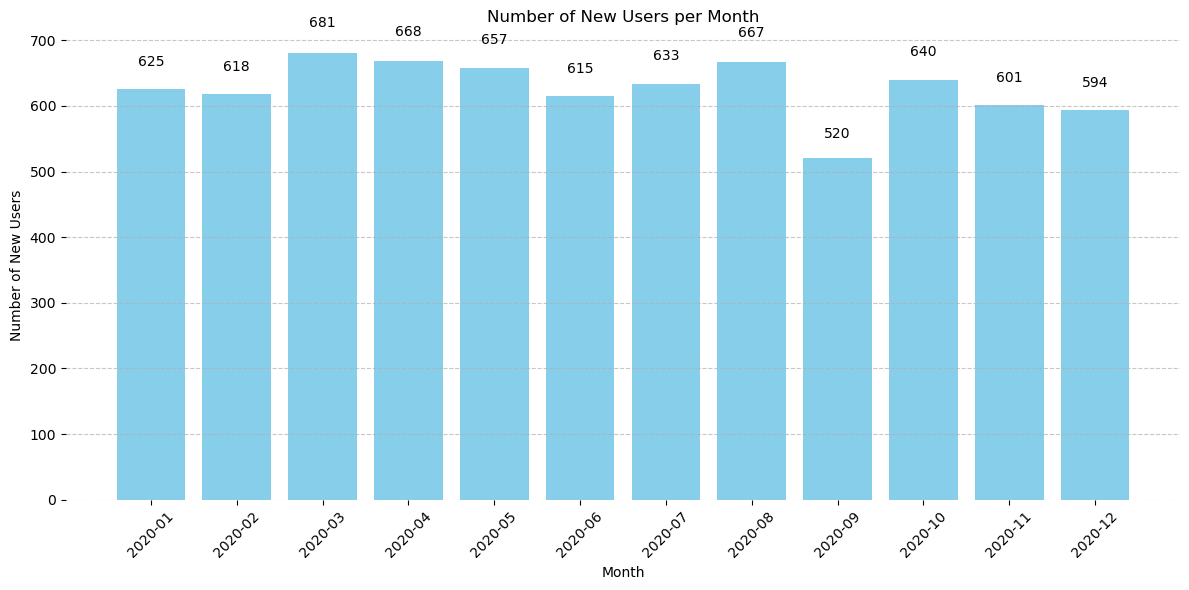

In [33]:
# Group by 'YearMonth' and count the number of unique new users
monthly_new_users = merged_df[merged_df['Type_user'] == 'New'].groupby('YearMonth')['user_id'].nunique().reset_index()

# Rename columns for clarity
monthly_new_users.columns = ['Month', 'New_Users']

# Plot the data as a column chart
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_new_users['Month'].astype(str), monthly_new_users['New_Users'], color='skyblue')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05 * yval, int(yval), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of New Users')
plt.title('Number of New Users per Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove border lines around the chart
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
# Show the plot
plt.tight_layout()
plt.show()

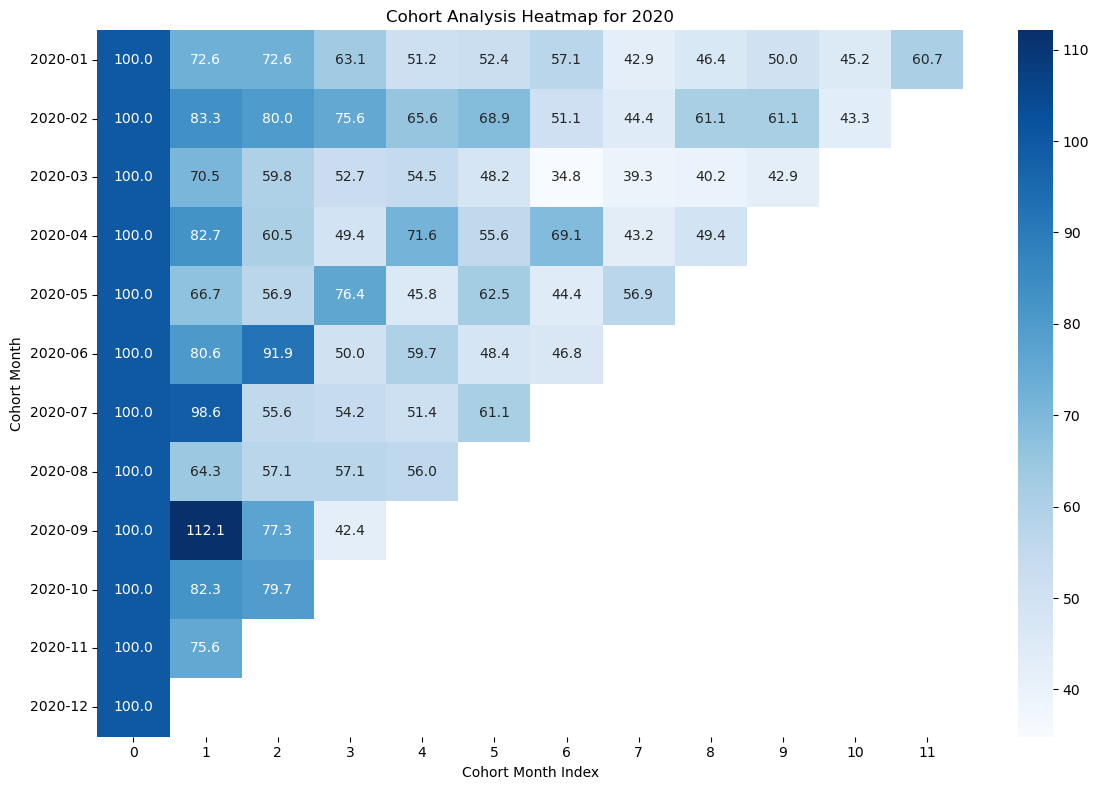

In [41]:
# Convert dates to datetime
transactions['Date'] = pd.to_datetime(transactions['Date'], errors='coerce')
user_info['first_tran_date'] = pd.to_datetime(user_info['first_tran_date'], errors='coerce')
# Filter data for the year 2020
transactions = transactions[transactions['Date'].dt.year == 2020]
user_info = user_info[user_info['first_tran_date'].dt.year == 2020]
# Merge the data
transactions['user_id'] = transactions['user_id'].astype(str)
user_info['user_id'] = user_info['user_id'].astype(str)
merged_df = pd.merge(transactions, user_info, on='user_id', how='left')

# Extract cohort month and transaction month
merged_df['CohortMonth'] = merged_df['first_tran_date'].dt.to_period('M')
merged_df['TransactionMonth'] = merged_df['Date'].dt.to_period('M')

# Convert periods to integers for calculation
merged_df['CohortMonthInt'] = merged_df['CohortMonth'].astype('int64')
merged_df['TransactionMonthInt'] = merged_df['TransactionMonth'].astype('int64')

# Create a cohort group for each user
merged_df['CohortIndex'] = merged_df['TransactionMonthInt'] - merged_df['CohortMonthInt']

# Aggregate data to find the number of unique users in each cohort and period
cohort_data = merged_df.groupby(['CohortMonth', 'CohortIndex'])['user_id'].nunique().reset_index()

# Pivot the data for the heatmap
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='user_id')

# Calculate retention rates as percentages
cohort_sizes = cohort_pivot.iloc[:, 0]  # Number of users in the first cohort month
retention = cohort_pivot.divide(cohort_sizes, axis=0) * 100

# Plot the cohort heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt=".1f", cmap="Blues", cbar=True)

# Add labels and title
plt.xlabel('Cohort Month Index')
plt.ylabel('Cohort Month')
plt.title('Cohort Analysis Heatmap for 2020')

# Show the plot
plt.tight_layout()
plt.show()